In [50]:
import numpy as np
import matplotlib.pyplot as plt 

import pandas as pd  
import seaborn as sns 

%matplotlib inline

In [51]:
from sklearn.datasets import load_boston
boston_data = load_boston()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [52]:
data = boston_data['data']
x_input = data[:, [2,5]]
y_target = boston_data['target']
boston_data

{'DESCR': ".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate p

In [53]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(x_input, boston_data.target, test_size = 0.2)

train_X, test_X, train_y, test_y = train_test_split(x_input, boston_data.target, test_size=0.2, random_state=1)
 
train_X, val_X, train_y, val_y = train_test_split(train_X, train_y, test_size=0.25, random_state=1)


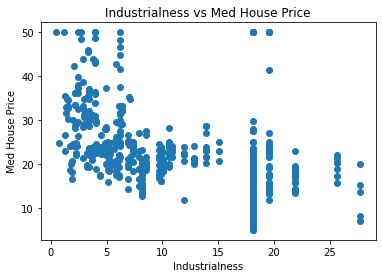

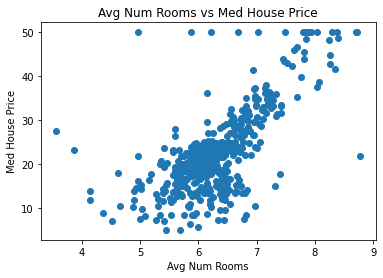

In [54]:
plt.title('Industrialness vs Med House Price')
plt.scatter(x_input[:, 0], y_target)
plt.xlabel('Industrialness')
plt.ylabel('Med House Price')
plt.show()

plt.title('Avg Num Rooms vs Med House Price')
plt.scatter(x_input[:, 1], y_target)
plt.xlabel('Avg Num Rooms')
plt.ylabel('Med House Price')
plt.show()

In [55]:
print("Size of data X train matrix %s"  % str(train_X.shape))
print("Size of data Y train array %s"  % str(train_y.shape))
print("Size of data X test matrix %s"  % str(test_X.shape))
print("Size of data Y test array %s"  % str(test_y.shape))
print("Size of data X test matrix %s"  % str(val_X.shape))
print("Size of data Y test array %s"  % str(val_y.shape))

Size of data X train matrix (303, 2)
Size of data Y train array (303,)
Size of data X test matrix (102, 2)
Size of data Y test array (102,)
Size of data X test matrix (101, 2)
Size of data Y test array (101,)


In [56]:
def np_cost(w, X, y):
    '''
    Evaluate the cost function in a non-vectorized manner for 
    inputs `X` and targets `y`, at weights `w` and `b`.
    
    X: 2D array dataset that has (m, n) dimension. 
    y: list of targets that has (n, ) dimension.
    w: list of weights that has (n, ) dimension
    b: a scalar bias.
    
    Return a scalar cost value of `w`, `b`.
    '''
    
    cost = 0
    m = X.shape[0]
    for i in range(m):
        y_hat = w[0]*X[i, 0] + w[1]*X[i, 1] + w[2]*X[i, 2] 
        cost += (y_hat - y[i])**2 
        
    return cost/(2*m)

In [57]:
m_train = train_X.shape[0]
bias_train = np.ones((m_train,1))

In [58]:
m_test = test_X.shape[0]
bias_test = np.ones((m_test,1))

In [59]:
m_val = val_X.shape[0]
bias_val = np.ones((m_val,1))

In [60]:
train_X_new = np.append(train_X, bias_train, axis = 1)
test_X_new = np.append(test_X, bias_test, axis = 1)
val_X_new = np.append(val_X, bias_val, axis = 1)

In [61]:
print("Size of data X train matrix %s"  % str(train_X_new.shape))
print("Size of data Y train array %s"  % str(train_y.shape))
print("Size of data X test matrix %s"  % str(test_X_new.shape))
print("Size of data Y test array %s"  % str(test_y.shape))
print("Size of data X test matrix %s"  % str(val_X.shape))
print("Size of data Y test array %s"  % str(val_y.shape))

Size of data X train matrix (303, 3)
Size of data Y train array (303,)
Size of data X test matrix (102, 3)
Size of data Y test array (102,)
Size of data X test matrix (101, 2)
Size of data Y test array (101,)


In [62]:
np_cost([20, 3, 5], train_X_new, train_y) 

35657.99484411056

In [63]:
np_cost([0, 3, 5], train_X_new, train_y) 

31.972577443894377

In [64]:
def np_cost_vectorized(w, X, y):
    '''
    Evaluate the cost function in a vectorized manner for 
    inputs `X` and targets `t`, at weights `w` and `b`.
    
    X: dataset matrix has (m, n) dimension. 
    y: targets vector has (n, ) dimension.
    w: weights vector has (n, ) dimension
    b: a scalar bias.
    
    Return a scalar cost value of `w`, `b`.
    '''
    
    m = X.shape[0] 
    w = np.array(w) 
    y_hat = np.dot(X, w)
    
    return np.sum((y_hat - y)**2)/(2*m)

In [65]:
np_cost_vectorized([20, 3, 5], train_X_new, train_y) 

35657.99484411055

In [66]:
np_cost_vectorized([0, 3, 5], train_X_new, train_y)

31.97257744389439

In [67]:
def np_grad_fn(w, X, y):
    '''
    Given `w` - a current "Guess" of what our weights should be
          `X` - matrix of shape (m, n + 1) of input features
          `y` - target y values
    Return gradient of each weight evaluated at the current value
    '''
    
    grad_w = np.zeros(np.array(w).shape)
    m = X.shape[0]
    y_hat = np.dot(X, w)
    for j in range(grad_w.shape[0]):
        for i in range(m):
            grad_w[j] += (y_hat[i] - y[i])*X[i, j]/m
    return grad_w

In [68]:
w = [0.1, 0.2, 0.3]
np_grad_fn(w, train_X_new, train_y)

array([-190.05271642, -129.83247264,  -20.00966601])

In [69]:
def np_grad_fn_vectorized(w, X, y):
    '''
    Given `w` - a current "Guess" of what our weights should be
          `X` - matrix of shape (m, n + 1) of input features
          `y` - target y values
    Return gradient of each weight evaluated at the current value
    '''

    m, n = X.shape
    y_hat = np.dot(X, w)
    grad_w = np.dot(X.T, y_hat - y)/m
    
    return grad_w

In [70]:
w = [0.1, 0.2, 0.3]
np_grad_fn_vectorized(w, train_X_new, train_y)

array([-190.05271642, -129.83247264,  -20.00966601])

In [71]:
def np_solve_via_gradient_descent(X, y, print_every=5000,
                                  niter=100000, alpha=0.005):
    '''
    Given `X` - matrix of shape (m, n+1) of input features
          `y` - target y values
    Solves for linear regression weights.
    Return weights after `niter` iterations.
    '''

    m, n = X.shape
    J_all = []

    w = np.zeros((n,))
    for k in range(niter):
        
        dw = np_grad_fn_vectorized(w, X, y) 
        w = w - alpha*dw
        J_all.append(np_cost_vectorized(w, X, y))

        if k % print_every == 0:
            print('Weight after %d iteration: %s' % (k, str(w)))
    return w, J_all

In [72]:
opt_w, J_all = np_solve_via_gradient_descent(train_X_new, train_y, niter=500000)

Weight after 0 iteration: [1.12294614 0.7328009  0.11344884]
Weight after 5000 iteration: [-0.46418686  4.90827762 -2.78415189]
Weight after 10000 iteration: [-0.4423742   5.3047305  -5.54205076]
Weight after 15000 iteration: [-0.4247561   5.62494566 -7.76960686]
Weight after 20000 iteration: [-0.41052596  5.88358359 -9.56880487]
Weight after 25000 iteration: [ -0.39903226   6.09248555 -11.02201787]
Weight after 30000 iteration: [ -0.3897488    6.26121575 -12.19577863]
Weight after 35000 iteration: [ -0.38225054   6.39749921 -13.1438257 ]
Weight after 40000 iteration: [ -0.3761942    6.50757541 -13.90956372]
Weight after 45000 iteration: [ -0.37130248   6.59648401 -14.52805064]
Weight after 50000 iteration: [ -0.36735145   6.66829553 -15.0276028 ]
Weight after 55000 iteration: [ -0.36416019   6.72629771 -15.43109128]
Weight after 60000 iteration: [ -0.36158261   6.77314611 -15.75698911]
Weight after 65000 iteration: [ -0.3595007    6.81098558 -16.02021692]
Weight after 70000 iteration:

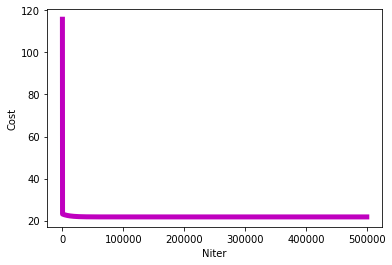

In [73]:
def plot_cost(J_all, num_niter):
	plt.xlabel('Niter')
	plt.ylabel('Cost')
	plt.plot(num_niter, J_all, 'm', linewidth = "5")
	plt.show()

n_niter = []
jplot = []
count = 0
for i in range(len(J_all)):
	jplot.append(J_all[i])
	n_niter.append(count)
	count += 1
jplot = np.array(jplot)
n_niter = np.array(n_niter)
plot_cost(jplot, n_niter)

In [75]:
print("Training cost:", np_cost_vectorized(opt_w, train_X_new, train_y)) #Training cost: 21.764321021582372

Training cost: 21.764321021582372


In [76]:
print("Testing cost:", np_cost_vectorized(opt_w, test_X_new, test_y)) #Testing cost: 20.06663014661267

Testing cost: 20.06663014661267


In [77]:
print("Validation cost:", np_cost_vectorized(opt_w, val_X_new, val_y)) #Validation cost: 13.43908537897677

Validation cost: 13.43908537897677
